# Problem Statement
Problem goes here

# Import Libraries

In [92]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [93]:
df = pd.read_csv("CustomerChurn_dataset.csv")

# Exploratory Data Analysis

In [94]:
df.drop(['customerID'], axis=1, inplace=True)
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [95]:
print("The shape of the dataset is: ", df.shape)

The shape of the dataset is:  (7043, 20)


In [96]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Findings:
1. There are no null values so there is no need for imputation.
2. Churn is the target value.
3. There are 18 non-numerical attributes and 3 numerical attributes.

In [98]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,2.0,0.0,5901.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Exploring type Object

In [100]:
# objects = df.select_dtypes(exclude=["number"])
objects = [i for i in df.columns if df[i].dtype=='O']
print("There are", len(objects), "object attributes")
print("These are:", objects)

There are 17 object attributes
These are: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [101]:
df[objects].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [102]:
for i in objects:
    print(df[i].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: c

## Exploring Target Attribute

In [103]:
# Check for any null values
df['Churn'].isnull().sum()

0

In [104]:
# Number of distinct values
df['Churn'].nunique()

2

In [105]:
#View the unique values in Churn
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [106]:
# Check how many of each unique value there are
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [107]:
# Check how many of each unique value there are
df['Churn'].value_counts()/len(df)

Churn
No     0.73463
Yes    0.26537
Name: count, dtype: float64

Text(0.5, 1.0, 'Churn Share')

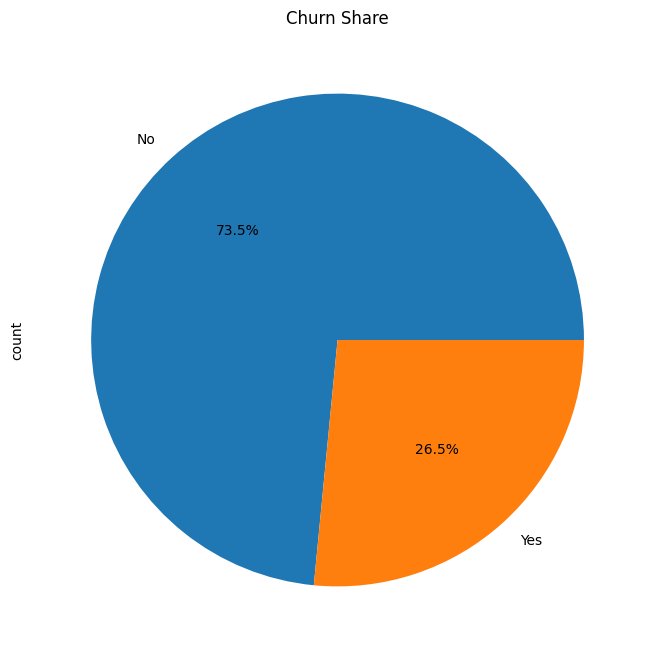

In [108]:
ax = plt.subplots(figsize=(18,8))

ax = df['Churn'].value_counts().plot.pie(autopct='%1.1f%%')
ax.set_title("Churn Share")

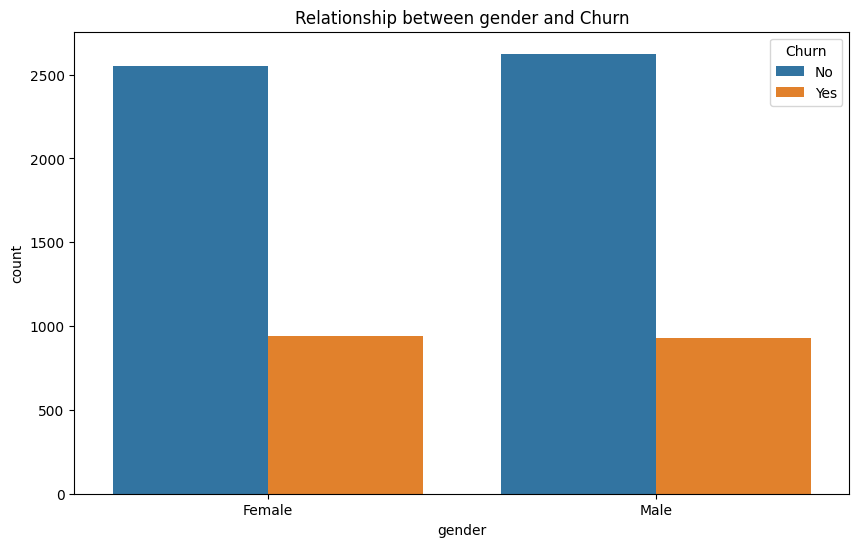

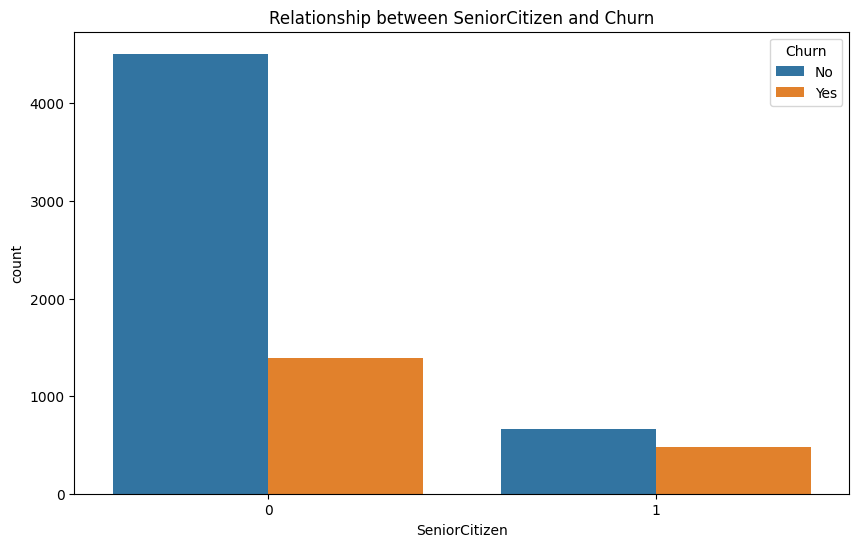

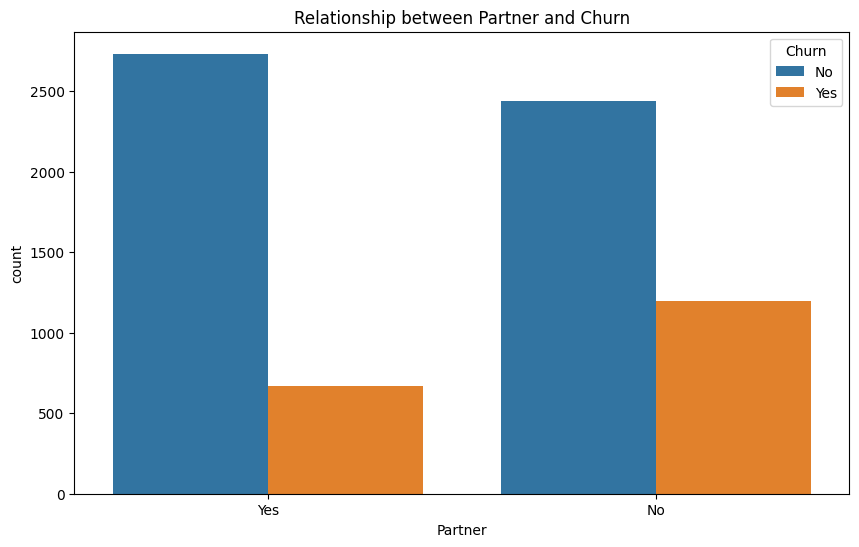

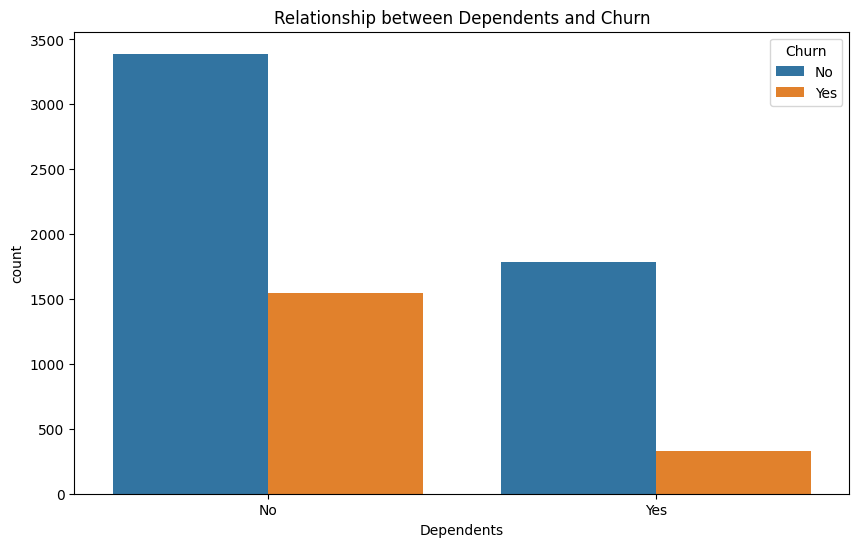

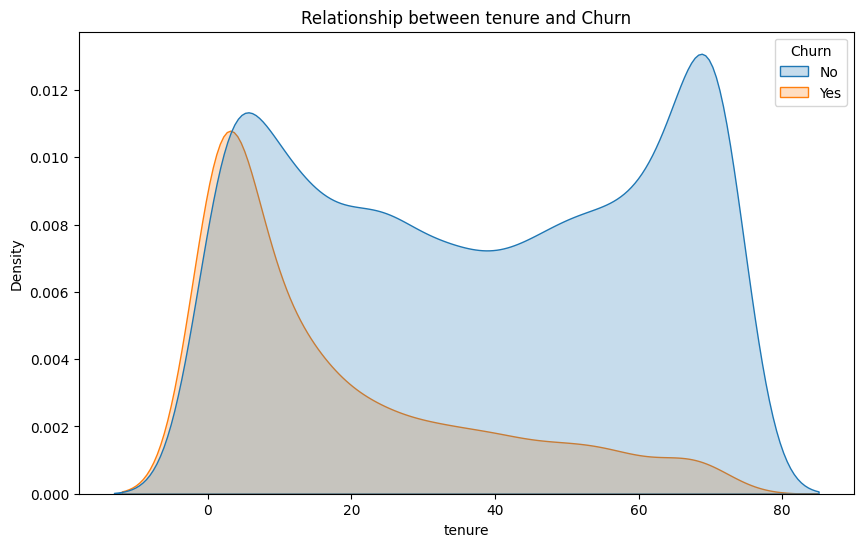

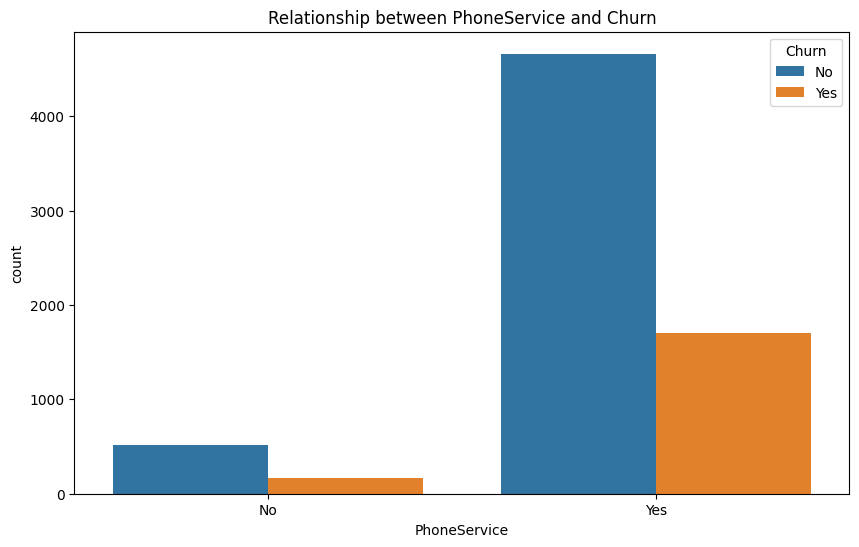

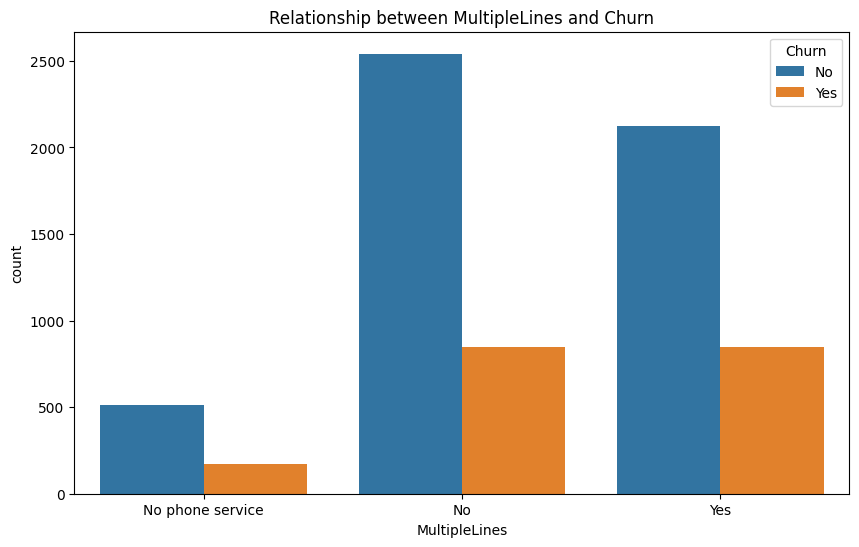

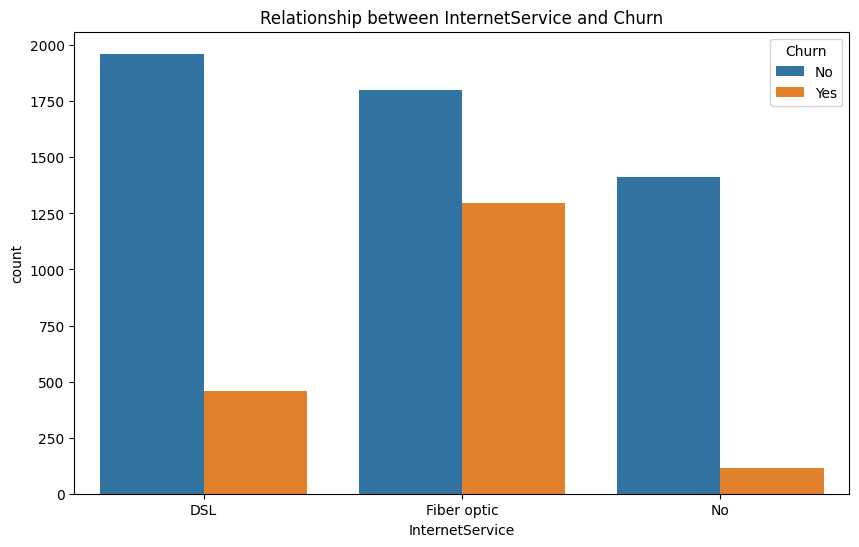

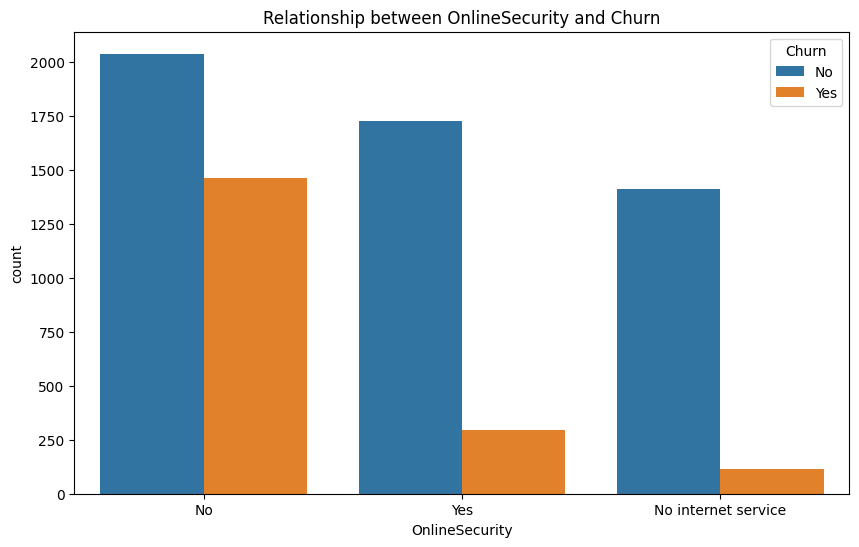

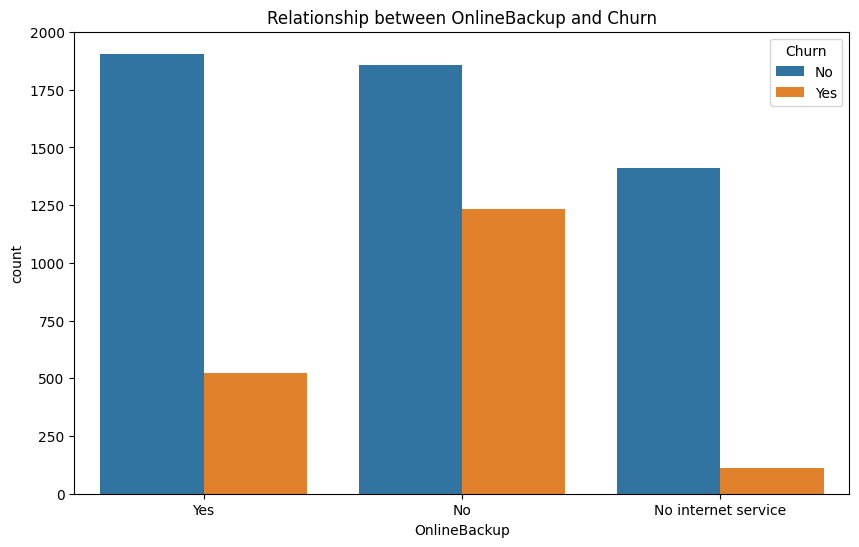

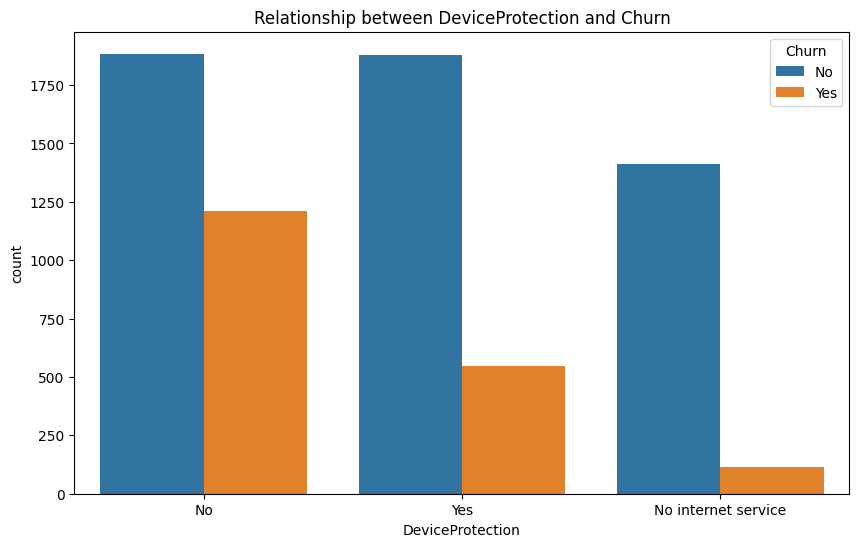

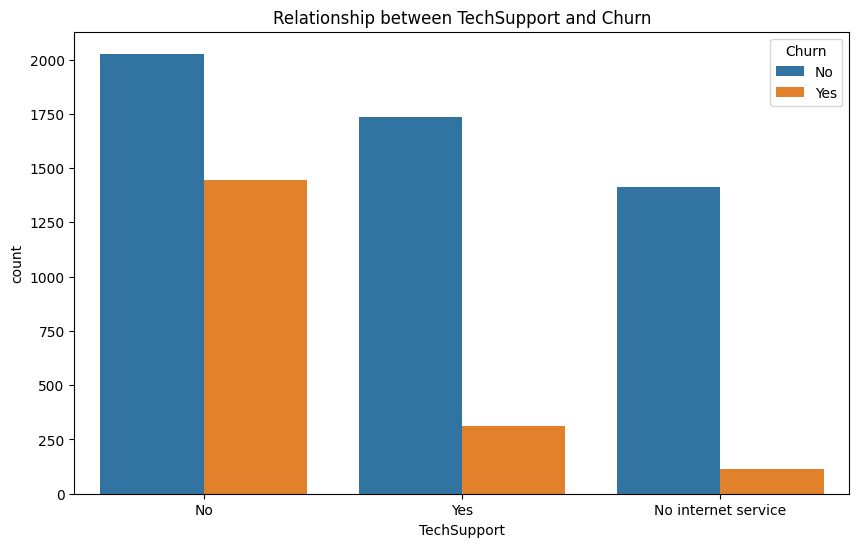

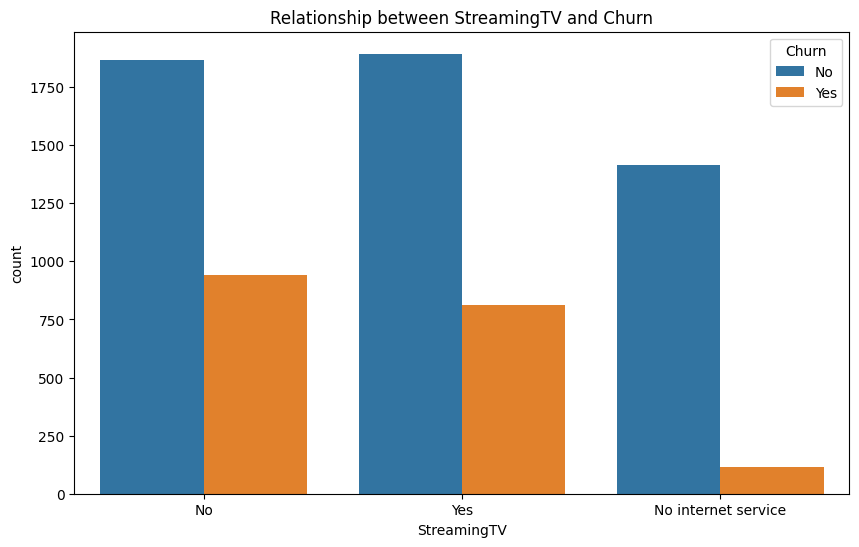

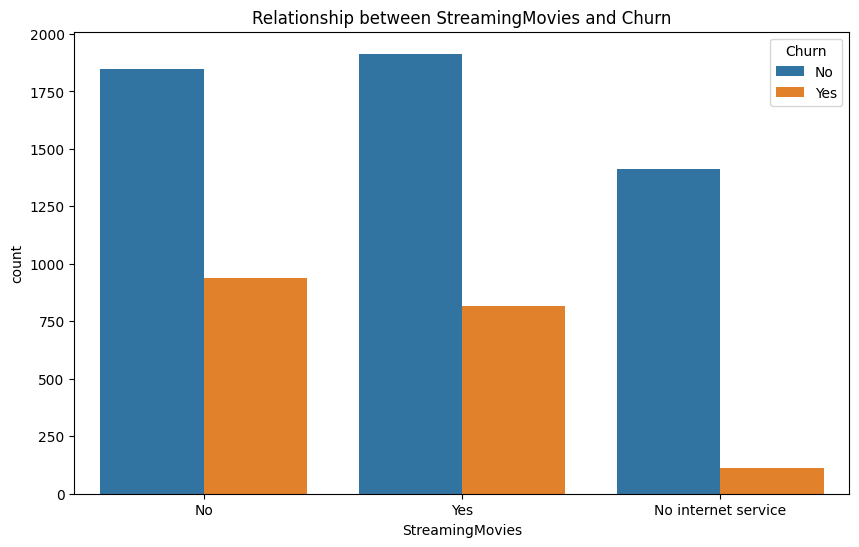

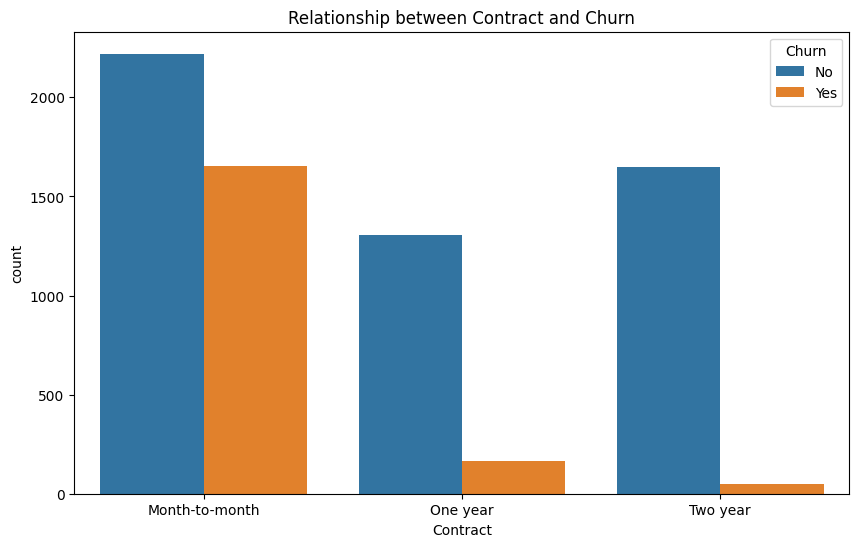

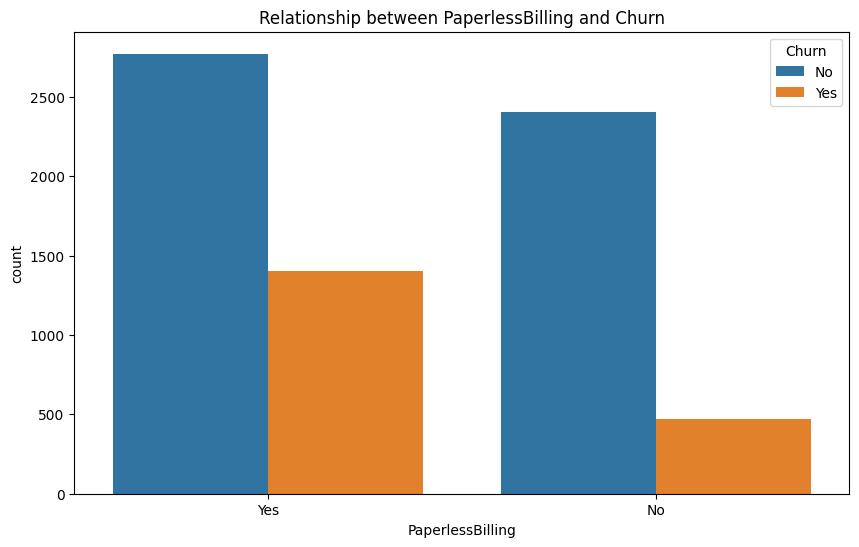

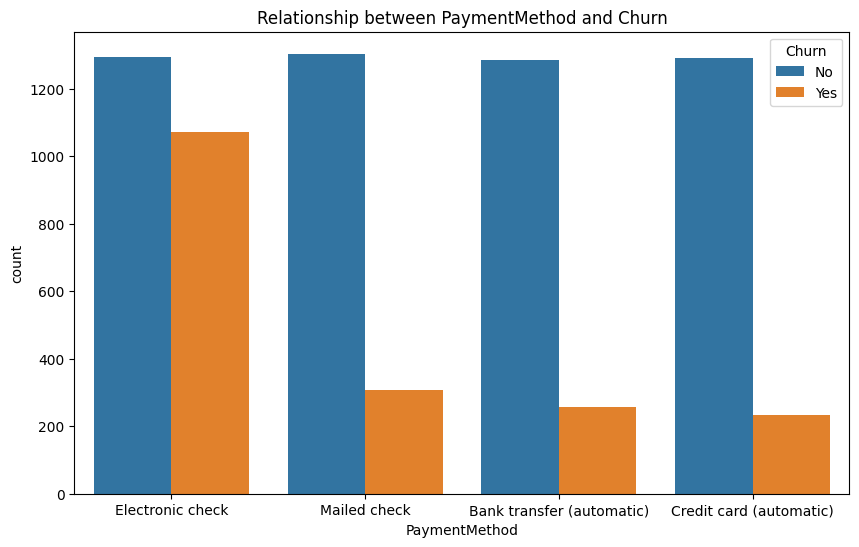

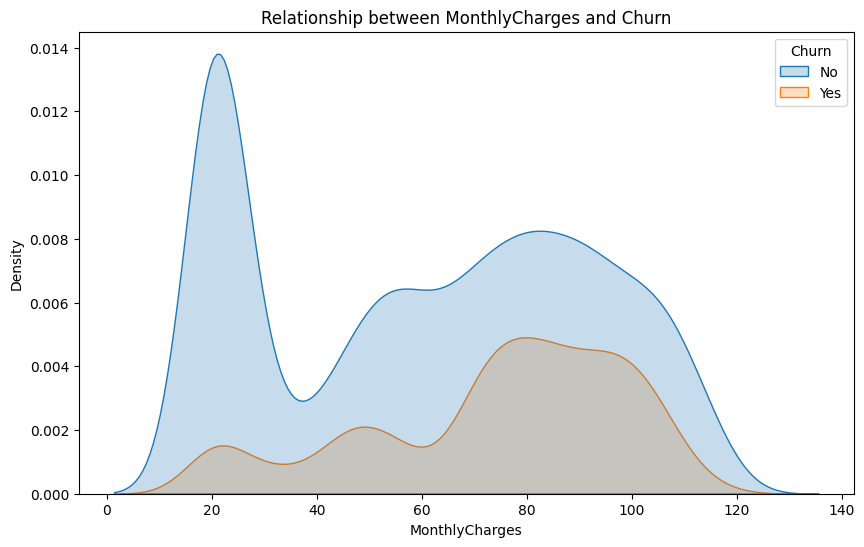

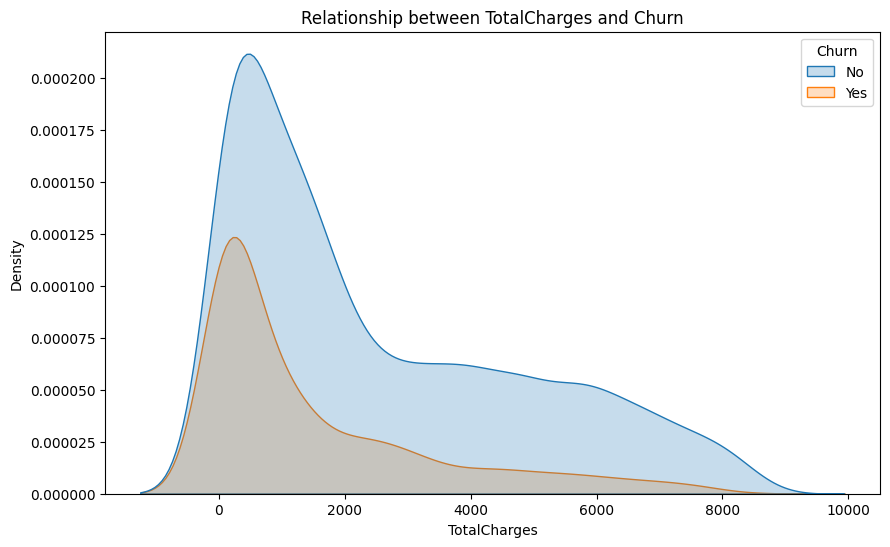

In [109]:
# List of attributes excluding the target 'Churn'
attributes = df.columns[df.columns != 'Churn']

# Plotting the relationship between each attribute and 'Churn'
for attribute in attributes:
    if df[attribute].dtype == 'object':
        # Categorical attributes
        plt.figure(figsize=(10, 6))
        sns.countplot(x=attribute, hue='Churn', data=df)
        plt.title(f'Relationship between {attribute} and Churn')
        plt.show()
    else:
        # Numerical attributes
        plt.figure(figsize=(10, 6))
        sns.kdeplot(data=df, x=attribute, hue='Churn', fill=True)
        plt.title(f'Relationship between {attribute} and Churn')
        plt.show()

## Exploring type Number

In [110]:
numbers = [i for i in df.columns if df[i].dtype!='O']
print("There are", len(numbers), "numerical attributes")
print("These are:", numbers)

There are 3 numerical attributes
These are: ['tenure', 'MonthlyCharges', 'TotalCharges']


In [111]:
df[numbers].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [112]:
df[numbers].isnull().sum()

tenure             0
MonthlyCharges     0
TotalCharges      11
dtype: int64

In [113]:
imputer = SimpleImputer(strategy='mean')

imputer.fit(df['TotalCharges'].values.reshape(-1, 1))
transformed = imputer.transform(df['TotalCharges'].values.reshape(-1, 1))
df['TotalCharges'] = transformed

In [114]:
df[numbers].isnull().sum()

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [115]:
for i in numbers:
    print(i,":",df[i].nunique(), "unique values")

tenure : 73 unique values
MonthlyCharges : 1585 unique values
TotalCharges : 6531 unique values


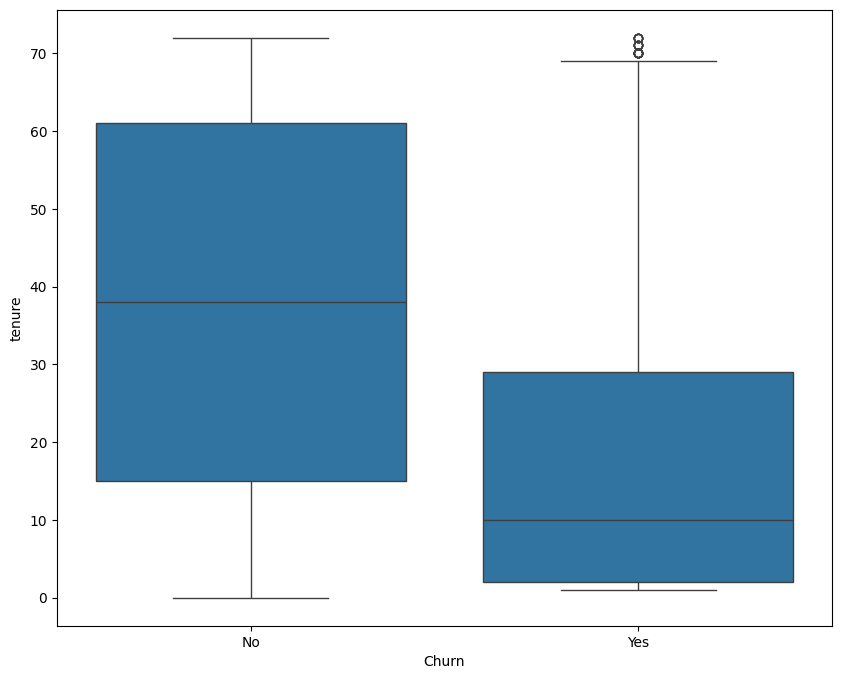

In [116]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Churn", y="tenure", data=df)
ax.set_title("")
plt.show()

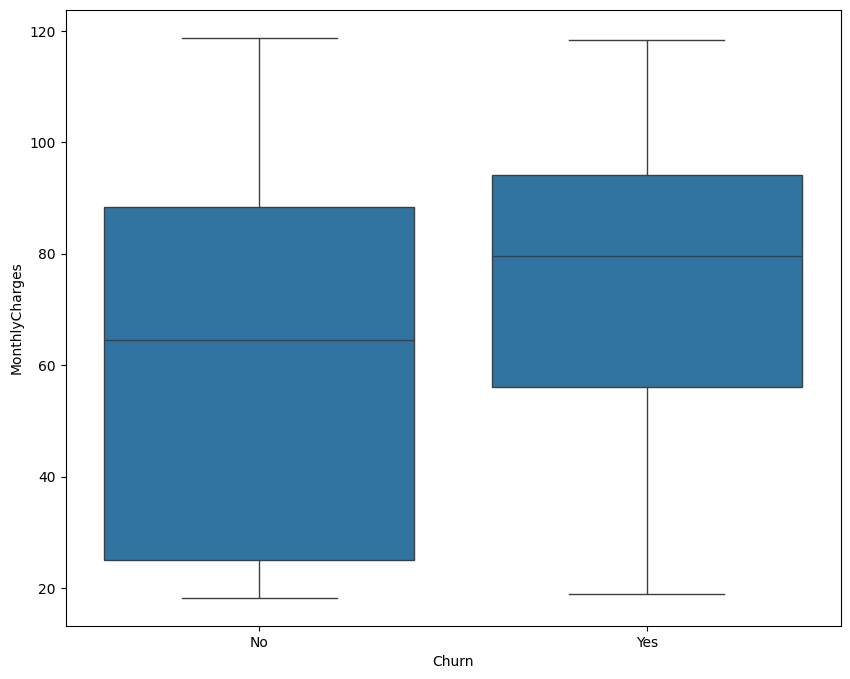

In [117]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
ax.set_title("")
plt.show()

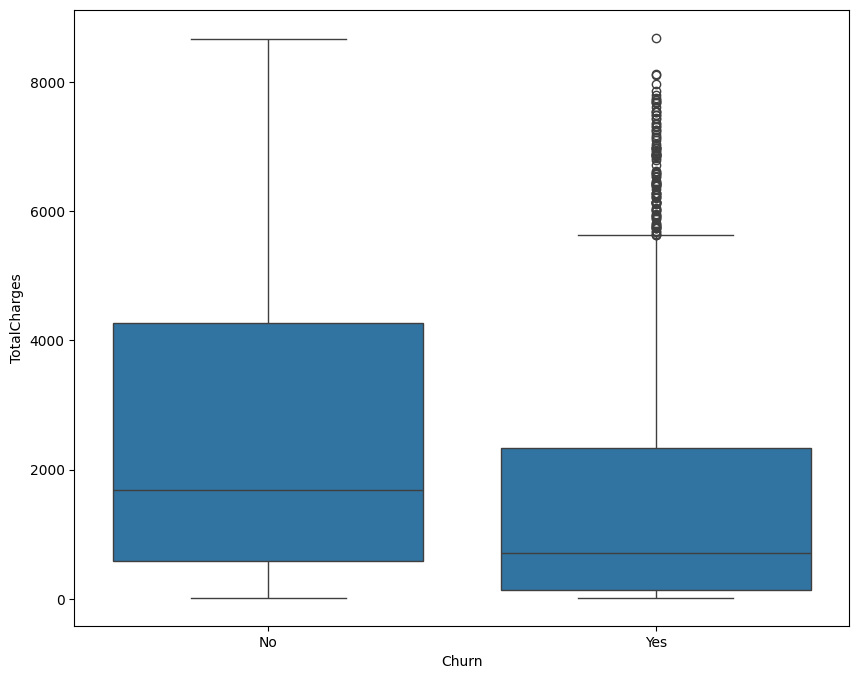

In [118]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Churn", y="TotalCharges", data=df)
ax.set_title("")
plt.show()

# Feature and Target Selection

In [119]:
y = df["Churn"]
X = df.drop(["Churn"], axis=1)

# Splitting

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
X_train.shape, X_test.shape

((5634, 19), (1409, 19))

# Feature Enginering

In [125]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

X_train[categorical].isnull().mean()

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
dtype: float64

In [123]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['tenure', 'MonthlyCharges', 'TotalCharges']

In [127]:
import category_encoders as ce
#Encode
label = ce.OneHotEncoder(cols= ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                         'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                         'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])


X_train = label.fit_transform(X_train)
X_test = label.transform(X_test)



In [129]:
X_train.shape, X_test.shape

((5634, 46), (1409, 46))

# Scaling

In [ ]:
columns_for_scaling = X_train.columns

In [ ]:
scaler = StandardScaler()

# Scale the numeric columns
X_train= scaler.fit_transform(X_train)
# X = pd.DataFrame(X, columns=X.columns)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[columns_for_scaling])
X_test = pd.DataFrame(X_test, columns=[columns_for_scaling])

# Random Forest

In [ ]:
rfr = RandomForestClassifier(n_estimators=10)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

print(accuracy_score(y_test, y_pred))



0.7146912704045423


In [ ]:
rfr_100 = RandomForestClassifier(n_estimators=100, random_state= 42)

rfr_100.fit(X_train, y_train)
y_pred_100 = rfr_100.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7146912704045423


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

TotalCharges                               0.159596
tenure                                     0.139692
MonthlyCharges                             0.138310
Contract_Month-to-month                    0.050555
OnlineSecurity_No                          0.034792
PaymentMethod_Electronic check             0.026876
TechSupport_No                             0.024055
InternetService_Fiber optic                0.022775
OnlineBackup_No                            0.019847
Contract_Two year                          0.018669
gender_Male                                0.018288
gender_Female                              0.017092
Partner_Yes                                0.015391
PaperlessBilling_Yes                       0.015386
Partner_No                                 0.015230
PaperlessBilling_No                        0.014606
DeviceProtection_No                        0.014232
MultipleLines_No                           0.013955
SeniorCitizen_0                            0.013084
Dependents_N

In [ ]:
X_train = X_train.drop(['OnlineSecurity_No internet service'], axis=1, inplace=True)
X_test = X_test.drop(['OnlineSecurity_No internet service'], axis=1, inplace=True)

C:\Users\Ato\AppData\Local\Temp\ipykernel_17904\1300495085.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_train = X_train.drop(['OnlineSecurity_No internet service'], axis=1, inplace=True)
C:\Users\Ato\AppData\Local\Temp\ipykernel_17904\1300495085.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_test = X_test.drop(['OnlineSecurity_No internet service'], axis=1, inplace=True)


In [233]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# EDA

In [70]:
ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=importances)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

AttributeError: module 'matplotlib' has no attribute 'subplots'